In [1]:
!pip install --upgrade mxnet==1.6 gluonts

Requirement already up-to-date: mxnet==1.6 in /usr/local/lib/python3.6/dist-packages (1.6.0)
Requirement already up-to-date: gluonts in /usr/local/lib/python3.6/dist-packages (0.4.2)


Example: In this example we will use the volume of tweets mentioning the AMZN ticker symbol.

In [0]:
import pandas as pd
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)

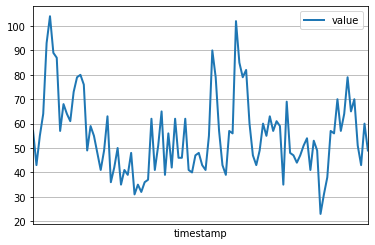

In [6]:
import matplotlib.pyplot as plt
df[:100].plot(linewidth=2)
plt.xticks([])
plt.grid(which='both')
plt.show()

We can now prepare a training dataset for our model to train on. Datasets in GluonTS are essentially iterable collections of dictionaries: each dictionary represents a time series with possibly associated features. For this example, we only have one entry, specified by the "start" field which is the timestamp of the first datapoint, and the "target" field containing time series data. For training, we will use data up to midnight on April 5th, 2015.

In [0]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

A forecasting model in GluonTS is a predictor object. One way of obtaining predictors is by training a correspondent estimator. Instantiating an estimator requires specifying the frequency of the time series that it will handle, as well as the number of time steps to predict. In our example we're using 5 minutes data, so freq="5min", and we will train a model to predict the next hour, so prediction_length=12. We also specify some minimal training options.

In [8]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

INFO:root:Using CPU
INFO:root:Using CPU
INFO:root:Start model training
INFO:root:Epoch[0] Learning rate is 0.001
  0%|          | 0/50 [00:00<?, ?it/s]INFO:numexpr.utils:NumExpr defaulting to 2 threads.


learning rate from ``lr_scheduler`` has been overwritten by ``learning_rate`` in optimizer.


INFO:root:Number of parameters in DeepARTrainingNetwork: 26844
100%|██████████| 50/50 [00:05<00:00,  8.48it/s, avg_epoch_loss=4.42]
INFO:root:Epoch[0] Elapsed time 5.903 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.417445
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.56it/s, avg_epoch_loss=4.1]
INFO:root:Epoch[1] Elapsed time 5.846 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.097110
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.79it/s, avg_epoch_loss=4.03]
INFO:root:Epoch[2] Elapsed time 5.693 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=4.026465
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.60it/s, avg_epoch_loss=4.02]
INFO:root:Epoch[3] Elapsed time 5.821 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=4.022169
INFO:root:Epoch[4] Learning rate is 0.001
100%|██████████| 50/50 [00:05<00:00,  8.57it/s, avg_epoch_loss=3.98]
INFO:

We're now ready to make predictions: we will forecast the hour following the midnight on April 15th, 2015.

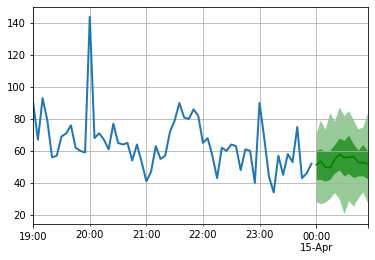

In [9]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')

Note that the forecast is displayed in terms of a probability distribution: the shaded areas represent the 50% and 90% prediction intervals, respectively, centered around the median (dark green line).